In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

# Формула экспоненциального сглаживания для модели Хольта
$$L_t=kY_t+(1-k)(L_{t-1}-T_{t-1}), \text{ где} $$

$$L_t\text{  – сглаженная величина на текущий период;}$$

$$k \text{ – коэффициент сглаживания ряда;}$$

$$Y_t \text{ – текущие значение ряда (например, объём продаж);}$$

$$L_{t-1} \text{ – сглаженная величина за предыдущий период;}$$

$$T_{t-1} \text{ – значение тренда за предыдущий период.}$$

# Формула экспоненциального сглаживания для модели Хольта-Уинтерса
$$L_t=\frac{kY_t}{S_{t-s}}+(1-k)(L_{t-1}-T_{t-1}), \text{ где} $$

$$L_t\text{  – сглаженная величина на текущий период;}$$

$$k \text{ – коэффициент сглаживания ряда;}$$

$$Y_t \text{ – текущие значение ряда (например, объём продаж);}$$

$$L_{t-1} \text{ – сглаженная величина за предыдущий период;}$$

$$T_{t-1} \text{ – значение тренда за предыдущий период;}$$

$$S_{t-s} \text{ –коэффициент сезонности предыдущего периода.}$$

# Формула нахождения тренда
$$T_t=b(L_t - L_{t-1})+(1-b)T_{t-1}, \text{ где} $$

$$T_t \text{ – значение тренда на текущий период;}$$

$$b \text{ – коэффициент сглаживания тренда;}$$

$$L_t\text{  – сглаженная величина на текущий период;}$$

$$L_{t-1} \text{ – сглаженная величина за предыдущий период;}$$

$$T_{t-1} \text{ – значение тренда за предыдущий период;}$$

# Формула нахождения сезонности
$$S_t=\frac{qY_t}{L_t}+(1-q)S_{t-s}, \text{ где} $$

$$S_t \text{ – коэффициент сезонности для текущего периода;}$$

$$q \text{ – коэффициент сглаживания сезонности;}$$

$$L_t\text{  – сглаженная величина на текущий период;}$$

$$Y_t \text{ – текущее (реальное) значение ряда;}$$

$$S_{t-s} \text{ – коэффициент сезонности за этот же период в предыдущем сезоне.}$$

# Прогноз по методу Хольта
$$Ŷ_{t+p} = L_t + pT_t, \text{ где} $$

$$Ŷ_{t+p} \text{ – прогноз по методу Хольта на p период;}$$ 

$$L_t \text{ – экспоненциально сглаженная величина за последний период;}$$

$$p \text{ – на сколько периодов делается прогноз;}$$

$$T_t \text{ – тренд за последний период.}$$

# Прогноз по методу Хольта-Уинтерса
$$Ŷ_{t+p} = (L_t + pT_t)S_{t-s+p}, \text{ где} $$

$$Ŷ_{t+p} \text{ – прогноз по методу Хольта на p период;}$$ 

$$L_t \text{ – экспоненциально сглаженная величина за последний период;}$$

$$p \text{ – на сколько периодов делается прогноз;}$$

$$T_t \text{ – тренд за последний период;}$$

$$S_{t-s+p} \text{ – коэффициент сезонности за этот же период в последнем сезоне.}$$

In [346]:
import numpy as np #построение прогноза по методу Хольта
import matplotlib.pyplot as plt
import pandas as pd
import itertools
# переменными в функции являются N-выборка, a-коэффициент сглаживания ряда,
# b-коэффициент сглаживания тренда, p-на сколько периодов прогноз
class HOLT_prediction:
    
    def Holt(self,N,p,kwargs = []) :
        if len(kwargs) != 0:
            ab = kwargs
            for i in ab:
                print('best parametr alpha: ',i[0])
                print('best parametr betta: ',i[1])
        else:
            # Определите a,b в диапазоне 0-1
            alpha = betta = np.arange(0.1, 1, 0.01)
            # Сгенерируйте различные комбинации a,b
            ab = list(itertools.product(alpha,betta))
        mistakes = {}#словарь для учета отклонений
        #print(ab)
        for i in ab:
            a = i[0]
            b = i[1]
            L = [N[0]]#создание списка для последующего добавления эксп. сглаживания, первое значение берется за начальное
            T = [0]#создание списка для тренда, первое значение-нулевое, т.к. в начале тренда нет
            P_compare = []#создание списка для сравнения с реальным по методу Хольта
            P_predicted = []#создание списка для прогноза по Хольту
            count = -1#создание счетчика
            for j in N[1:]:
                count+=1 #добавление к счечтику для прохода по спискам
                L.append(i[0]*j+(1-i[0])*(L[count]-T[count])) #подсчет нового значения эксп.сглаживания и добавление в соответствующий массив
                T.append(i[1]*(L[count+1]-L[count])+(1-i[1])*T[count])#аналогично для тренда
            for i in range(len(L)+p):
                if i in range(len(L)):
                    P_compare.append(L[i]+i*T[i])
                else:
                    P_predicted.append(L[-1]+i*T[-1])#аналогично для прогноза по Хольту
            mistakes.update({(a,b):(sum(abs(np.array(P_compare)-np.array(N))))})#определяем отклонения, вносим в словарь ошибок
        return ((P_compare,P_predicted,L,T)) if len(kwargs) != 0 else list((sorted(mistakes.items(), key=lambda x: x[1],reverse = False))[0:1])[0][0]
        
    def plotting(self,N,p):
        kwargs = [(self.Holt(N,p))]
        result = self.Holt(N,p,kwargs = kwargs)
        y1 = np.arange(len(result[0])) #игрек для графика хольта сравнения
        y3 = np.arange(len(N))#игрек для графика изначальных значений
        y2=np.arange(len(result[0])-1,len(result[1])+len(result[0])-1)#игрек для Хольта прогноза
        fig, ax = plt.subplots()
        plt.plot(y1,result[0],color = 'red',label = "Хольт для начальных значений")#здесь и далее чертим график
        plt.plot(y3,N,color = 'black',label = "Начальные значения")
        plt.plot(y2,result[1],color = 'green',label = "Хольт прогноз")   
        ax.set_xlabel('Период')
        ax.set_ylabel('Значение показателя')
        plt.legend(loc = 3,prop={'size': 7})
        plt.title('Holt Forecasting')
        print([(1-np.mean((np.array(result[0])-np.array(N))**2/np.array(N)**2))])
        m={'Real data':N,'L_t':result[2], 'T_t':result[3],'p_compare':result[0], 'p_predicted for {} periods'.format(p):result[1], 'accuracy':[(1-np.mean((np.array(result[0])-np.array(N))**2/np.array(N)**2))]}
        print(len(N))
        R = pd.DataFrame.from_dict(m,orient='index',columns = range(1,len(N)+1)) #возвращаем значения датафреймом из библотеки пандас
        print (R.transpose())





best parametr alpha:  0.1
best parametr betta:  0.3799999999999999
[0.9843132069060372]
36
    Real data           L_t         T_t     p_compare  \
1     17942.0  17942.000000    0.000000  17942.000000   
2     14370.0  17584.800000 -135.736000  17449.064000   
3     19775.0  17925.982400   45.492992  18016.968384   
4     28141.0  18906.540467  400.817721  20108.993629   
5     29692.0  19624.350472  521.274789  21709.449626   
6     26331.0  19825.868115  399.767073  21824.703481   
7     24839.0  19967.390938  301.634258  21777.196486   
8     36072.0  21306.381012  695.829468  26177.187288   
9     27976.0  21347.096389  446.886114  24922.185299   
10    28928.0  21702.989248  412.308677  25413.767339   
11    21455.0  21307.112514  105.198221  22359.094721   
12    17578.0  20839.522864 -112.461170  19602.449992   
13    24064.0  21263.185631   91.265926  22358.376741   
14    26355.0  21690.227734  218.860873  24535.419089   
15    25309.0  21855.130175  198.356669  24632.123540 

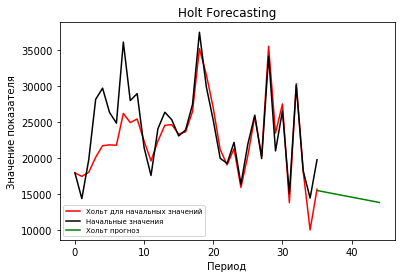

In [347]:
dataset = [17942,14370,19775,28141,29692,26331,24839,36072,27976,28928,21455,17578,24064,26355,25309,23065,23887,27436,37447,29856,25227,19963,19258,22172,16367,21937,25944,19916,34133,20985,26543,15063,30103,18224,14452,19763]   
model = HOLT_prediction()
model.plotting(dataset,10)
#прогнозные значения на 10 периодов идут в последнем столбце